In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/Users/tanu/Internship/BengaluruHouseRentPrediction/Bengaluru_House_Data.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [5]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2117,), dtype=object)

In [7]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [8]:
df[~df["total_sqft"].apply(is_float)].head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186.000
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,NaN,NaN,192.000
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,Gollela,2957 - 3450,NaN,NaN,224.500
122,Super built-up Area,18-Mar,Hebbal,4 BHK,SNontle,3067 - 8156,4.0,0.0,477.000
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,Vaarech,1042 - 1105,2.0,0.0,54.005
165,Super built-up Area,18-Dec,Sarjapur,2 BHK,Kinuerg,1145 - 1340,2.0,0.0,43.490
188,Super built-up Area,Ready To Move,KR Puram,2 BHK,MCvarar,1015 - 1540,2.0,0.0,56.800
224,Super built-up Area,19-Dec,Devanahalli,3 BHK,Jurdsig,1520 - 1740,NaN,NaN,74.820
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,NaN,34.46Sq. Meter,1.0,0.0,18.500
549,Super built-up Area,18-Sep,Hennur Road,2 BHK,Shxorm,1195 - 1440,2.0,0.0,63.770


In [9]:
def convert_sqft_to_number(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [10]:
df = df.copy()
df["total_sqft"] = df["total_sqft"].apply(convert_sqft_to_number)
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732.0,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300.0,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310.0,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020.0,6.0,NaN,370.00


### **EDA**

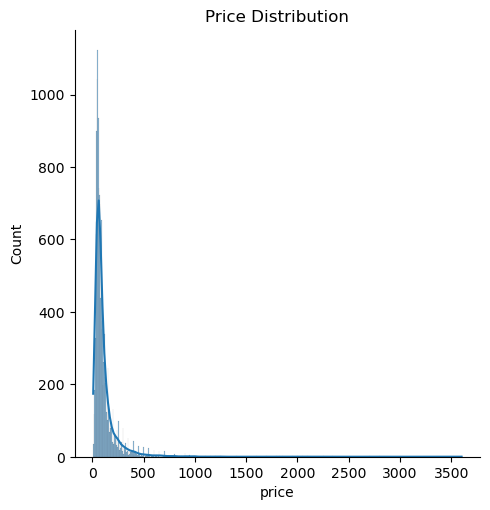

In [11]:
#To show price distribution

sns.displot(df['price'], kde=True)
plt.title('Price Distribution')
plt.show()

In [12]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['area_type', 'availability', 'location', 'size', 'society']

In [13]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [14]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [15]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [16]:
df['size'] = df['size'].str.extract(r'(\d+)').astype(float)
df.head

<bound method NDFrame.head of                   area_type   availability                  location  size  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   2.0   
1                Plot  Area  Ready To Move          Chikka Tirupathi   4.0   
2            Built-up  Area  Ready To Move               Uttarahalli   3.0   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   3.0   
4      Super built-up  Area  Ready To Move                  Kothanur   2.0   
...                     ...            ...                       ...   ...   
13315        Built-up  Area  Ready To Move                Whitefield   5.0   
13316  Super built-up  Area  Ready To Move             Richards Town   4.0   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   2.0   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   4.0   
13319  Super built-up  Area  Ready To Move              Doddathoguru   1.0   

       society  total_sqft  bath 

In [17]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,NaN,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5.0,ArsiaEx,3453.0,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4.0,NaN,3600.0,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2.0,Mahla T,1141.0,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4.0,SollyCl,4689.0,4.0,1.0,488.00


In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['area_type'] = le.fit_transform(df['area_type'])
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,3,19-Dec,Electronic City Phase II,2.0,Coomee,1056.0,2.0,1.0,39.07
1,2,Ready To Move,Chikka Tirupathi,4.0,Theanmp,2600.0,5.0,3.0,120.00
2,0,Ready To Move,Uttarahalli,3.0,NaN,1440.0,2.0,3.0,62.00
3,3,Ready To Move,Lingadheeranahalli,3.0,Soiewre,1521.0,3.0,1.0,95.00
4,3,Ready To Move,Kothanur,2.0,NaN,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,0,Ready To Move,Whitefield,5.0,ArsiaEx,3453.0,4.0,0.0,231.00
13316,3,Ready To Move,Richards Town,4.0,NaN,3600.0,5.0,NaN,400.00
13317,0,Ready To Move,Raja Rajeshwari Nagar,2.0,Mahla T,1141.0,2.0,1.0,60.00
13318,3,18-Jun,Padmanabhanagar,4.0,SollyCl,4689.0,4.0,1.0,488.00


In [19]:
#for null values
# drop rows where 'size' or 'location'is null
df = df.dropna(subset=['size', 'location','total_sqft']).copy()
# replace null values in 'society' with 'Not Mentioned'
df['society'] = df['society'].fillna('Not Mentioned')
#replace nulls in 'bath' and 'balcony' with mean
df['bath'] = df['bath'].fillna(df['bath'].mean())
df['balcony'] = df['balcony'].fillna(df['balcony'].mean())
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [20]:
def encode_avail(val):
    if pd.isnull(val):
        return np.nan
    val=val.strip().lower()
    if val in ['ready to move','immediate possession']:
        return 0
    return 1
df['availability'] = df['availability'].apply(encode_avail)
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,3,1,Electronic City Phase II,2.0,Coomee,1056.0,2.0,1.000000,39.07
1,2,0,Chikka Tirupathi,4.0,Theanmp,2600.0,5.0,3.000000,120.00
2,0,0,Uttarahalli,3.0,Not Mentioned,1440.0,2.0,3.000000,62.00
3,3,0,Lingadheeranahalli,3.0,Soiewre,1521.0,3.0,1.000000,95.00
4,3,0,Kothanur,2.0,Not Mentioned,1200.0,2.0,1.000000,51.00
...,...,...,...,...,...,...,...,...,...
13315,0,0,Whitefield,5.0,ArsiaEx,3453.0,4.0,0.000000,231.00
13316,3,0,Richards Town,4.0,Not Mentioned,3600.0,5.0,1.585649,400.00
13317,0,0,Raja Rajeshwari Nagar,2.0,Mahla T,1141.0,2.0,1.000000,60.00
13318,3,1,Padmanabhanagar,4.0,SollyCl,4689.0,4.0,1.000000,488.00


In [21]:
df['availability'].unique()

array([1, 0])

In [22]:
columns_check=['total_sqft','size','bath','price']
Q1 = df[columns_check].quantile(0.25)
Q3 = df[columns_check].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

mask = ~((df[columns_check] < lower_bound) | (df[columns_check] > upper_bound)).any(axis=1)
df_cleaned=df[mask].copy()
df_cleaned

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,3,1,Electronic City Phase II,2.0,Coomee,1056.0,2.0,1.0,39.07
2,0,0,Uttarahalli,3.0,Not Mentioned,1440.0,2.0,3.0,62.00
3,3,0,Lingadheeranahalli,3.0,Soiewre,1521.0,3.0,1.0,95.00
4,3,0,Kothanur,2.0,Not Mentioned,1200.0,2.0,1.0,51.00
5,3,0,Whitefield,2.0,DuenaTa,1170.0,2.0,1.0,38.00
...,...,...,...,...,...,...,...,...,...
13312,3,0,Bellandur,2.0,Not Mentioned,1262.0,2.0,2.0,47.00
13313,3,0,Uttarahalli,3.0,Aklia R,1345.0,2.0,1.0,57.00
13314,3,0,Green Glen Layout,3.0,SoosePr,1715.0,3.0,3.0,112.00
13317,0,0,Raja Rajeshwari Nagar,2.0,Mahla T,1141.0,2.0,1.0,60.00


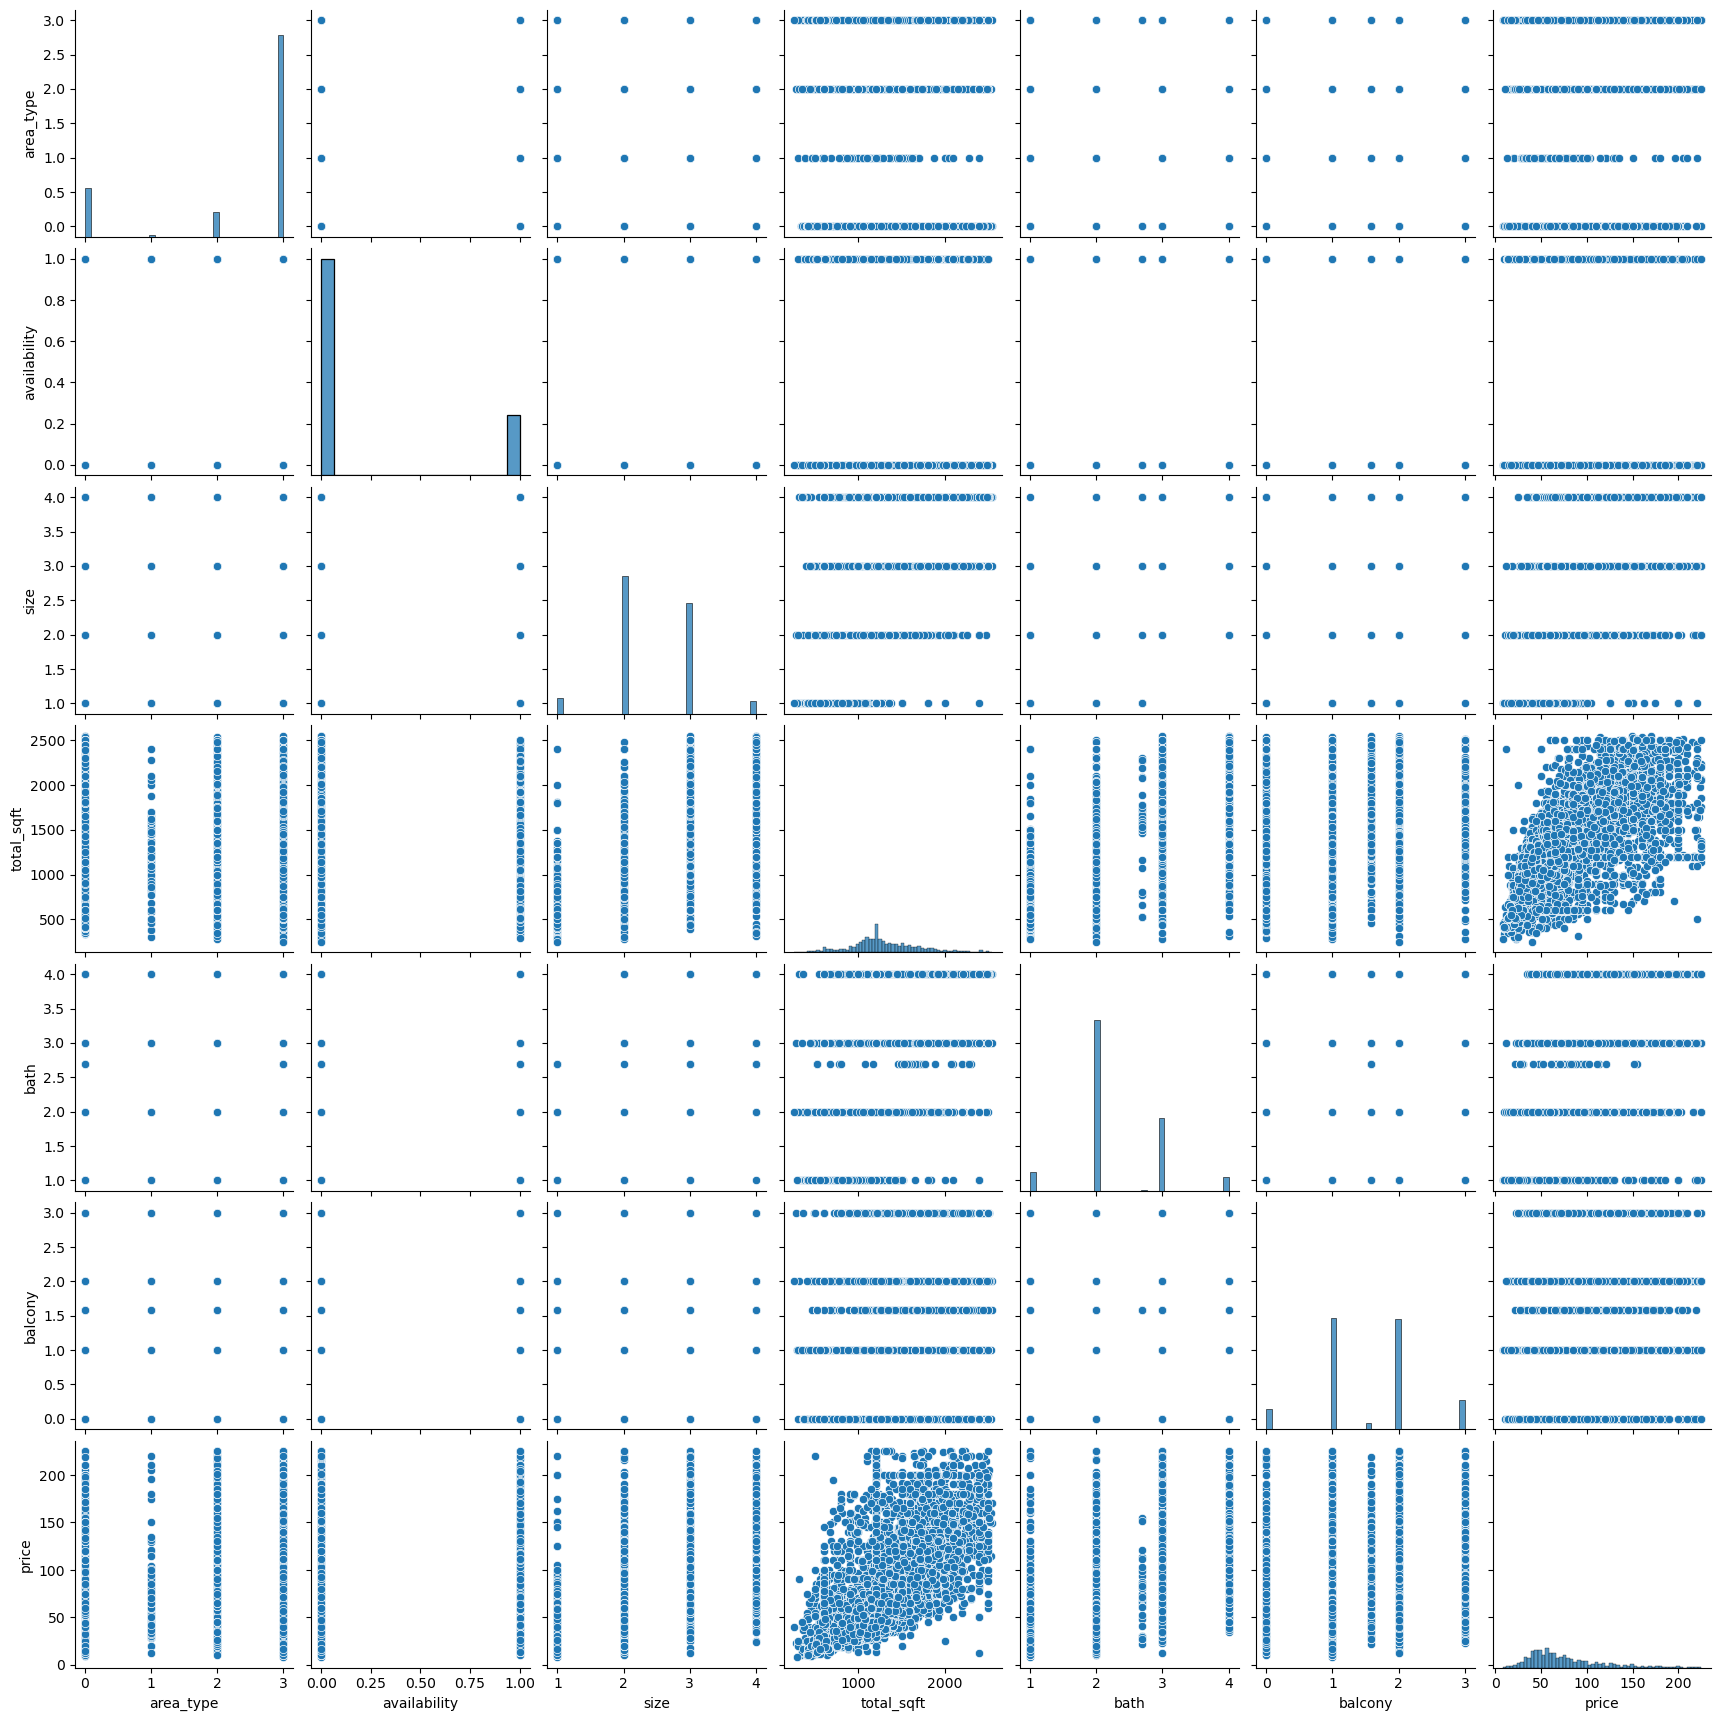

In [23]:
sns.pairplot(df_cleaned)
plt.show()

In [24]:
df_cleaned.location = df_cleaned.location.apply(lambda x: x.strip())
location_stats = df_cleaned['location'].value_counts(ascending=False)
location_stats

location
Whitefield                  431
Sarjapur  Road              332
Electronic City             300
Kanakpura Road              264
Thanisandra                 224
                           ... 
Thyagraj Nagar                1
Electronic City Phase 1,      1
Chikbasavanapura              1
MM Layout                     1
Wheelers Road                 1
Name: count, Length: 1096, dtype: int64

In [25]:
len(location_stats[location_stats<=10])
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                    10
Neeladri Nagar              10
Narayanapura                10
Gunjur Palya                10
Shivaji Nagar               10
                            ..
Thyagraj Nagar               1
Electronic City Phase 1,     1
Chikbasavanapura             1
MM Layout                    1
Wheelers Road                1
Name: count, Length: 892, dtype: int64

In [26]:
df_cleaned.location = df_cleaned.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df_cleaned.location.unique())

205

In [27]:
le1=LabelEncoder()
df_cleaned['location']=le1.fit_transform(df_cleaned['location'])

In [28]:
df_cleaned

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,3,1,67,2.0,Coomee,1056.0,2.0,1.0,39.07
2,0,0,191,3.0,Not Mentioned,1440.0,2.0,3.0,62.00
3,3,0,137,3.0,Soiewre,1521.0,3.0,1.0,95.00
4,3,0,131,2.0,Not Mentioned,1200.0,2.0,1.0,51.00
5,3,0,198,2.0,DuenaTa,1170.0,2.0,1.0,38.00
...,...,...,...,...,...,...,...,...,...
13312,3,0,38,2.0,Not Mentioned,1262.0,2.0,2.0,47.00
13313,3,0,191,3.0,Aklia R,1345.0,2.0,1.0,57.00
13314,3,0,74,3.0,SoosePr,1715.0,3.0,3.0,112.00
13317,0,0,166,2.0,Mahla T,1141.0,2.0,1.0,60.00


In [29]:
df_cleaned=df_cleaned.drop(['society'], axis='columns')
df_cleaned.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,3,1,67,2.0,1056.0,2.0,1.0,39.07
2,0,0,191,3.0,1440.0,2.0,3.0,62.00
3,3,0,137,3.0,1521.0,3.0,1.0,95.00
4,3,0,131,2.0,1200.0,2.0,1.0,51.00
5,3,0,198,2.0,1170.0,2.0,1.0,38.00


In [30]:
X = df_cleaned.drop('price', axis=1)

In [31]:
y=df_cleaned['price']

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler_X_stand=StandardScaler()
X_inter=pd.DataFrame(scaler_X_stand.fit_transform(X), columns=X.columns)
scaler_X_min=MinMaxScaler()
X_final=pd.DataFrame(scaler_X_min.fit_transform(X_inter), columns=X_inter.columns)
X_final

,area_type,availability,location,size,total_sqft,bath,balcony
0,1.0,1.0,0.328431,0.333333,0.350435,0.333333,0.333333
1,0.0,0.0,0.936275,0.666667,0.517391,0.333333,1.000000
2,1.0,0.0,0.671569,0.666667,0.552609,0.666667,0.333333
3,1.0,0.0,0.642157,0.333333,0.413043,0.333333,0.333333
4,1.0,0.0,0.970588,0.333333,0.400000,0.333333,0.333333
...,...,...,...,...,...,...,...
11060,1.0,0.0,0.186275,0.333333,0.440000,0.333333,0.666667
11061,1.0,0.0,0.936275,0.666667,0.476087,0.333333,0.333333
11062,1.0,0.0,0.362745,0.666667,0.636957,0.666667,1.000000
11063,0.0,0.0,0.813725,0.333333,0.387391,0.333333,0.333333


In [33]:
scaler_y_min=MinMaxScaler()
y_final=scaler_y_min.fit_transform(df_cleaned[['price']])
y_final

array([[0.14317972],
       [0.24884793],
       [0.40092166],
       ...,
       [0.47926267],
       [0.23963134],
       [0.04147465]], shape=(11065, 1))

In [34]:
#Correlation Matrix
X_final.select_dtypes(include=['number']).corr(method='pearson')

,area_type,availability,location,size,total_sqft,bath,balcony
area_type,1.000000,0.122153,-0.050547,-0.019989,0.058627,-0.004808,0.115777
availability,0.122153,1.000000,-0.077982,-0.054336,-0.024285,-0.024331,-0.135583
location,-0.050547,-0.077982,1.000000,0.026916,0.010758,0.035759,-0.003549
size,-0.019989,-0.054336,0.026916,1.000000,0.634058,0.786693,0.269132
total_sqft,0.058627,-0.024285,0.010758,0.634058,1.000000,0.640521,0.323966
bath,-0.004808,-0.024331,0.035759,0.786693,0.640521,1.000000,0.284635
balcony,0.115777,-0.135583,-0.003549,0.269132,0.323966,0.284635,1.000000


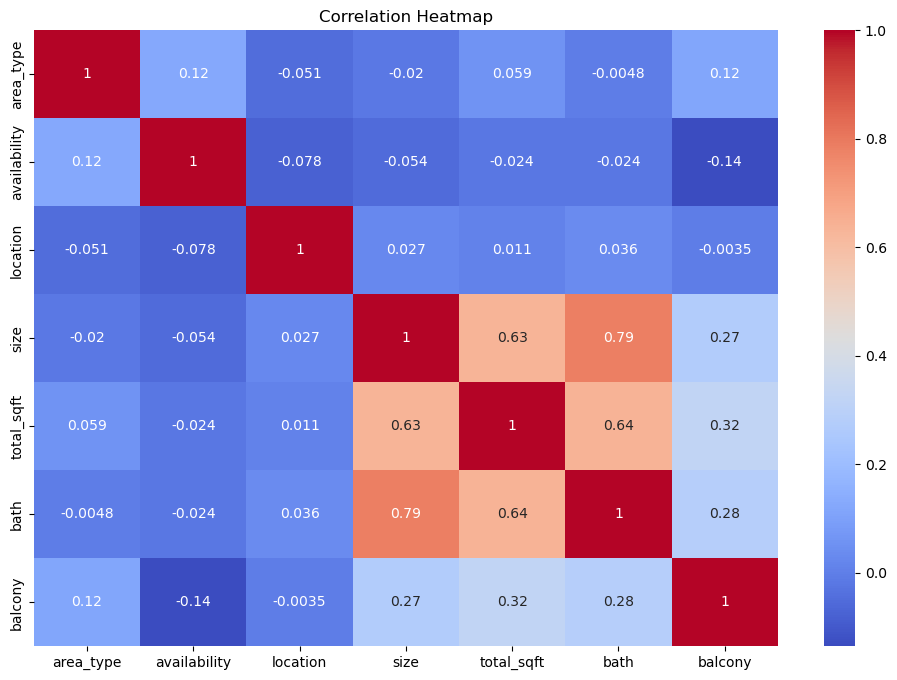

In [35]:
#To show correlation between all numerical variables

numerical_df = X_final.select_dtypes(include=['float64', 'int64'])
corr = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### Splitting dataset

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

In [37]:
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 8852
Testing set size: 2213


In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-validation R² scores:", scores)
print("Mean R²:", np.mean(scores))
print("Standard Deviation:", np.std(scores))


Cross-validation R² scores: [0.49453041 0.47995985 0.48490659 0.51453835 0.49494433]
Mean R²: 0.49377590741652966
Standard Deviation: 0.011853788617665893


In [39]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.49062379, 0.50700145, 0.50199685, 0.497991  , 0.49608279])

In [40]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=150, random_state=54)

In [41]:
from sklearn.metrics import mean_squared_error, r2_score
model_rf.fit(X_train, y_train)
y_pred=model_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2 Score:", r2)

/opt/anaconda3/envs/ml_env/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MSE: 0.011419666626437211
R2 Score: 0.6315623193762907


In [42]:
cross_val_score(model_rf, X, y, cv=cv)

array([0.6109173 , 0.61013244, 0.61929299, 0.64807855, 0.59092335])

In [43]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
model_xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

random_search = RandomizedSearchCV(
    estimator=model_xgb,
    param_distributions=param_dist,
    n_iter=35,  
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    random_state=42
)


In [44]:
random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test MSE:", mse)
print("Test R²:", r2)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
Best Parameters: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Test MSE: 0.009959220142494176
Test R²: 0.6786813406945951


In [45]:
import joblib
joblib.dump(best_model, 'xgb_model.pkl')

['xgb_model.pkl']

In [46]:
joblib.dump(le, 'le_area.pkl')
joblib.dump(le1, 'le_location.pkl')
joblib.dump(scaler_X_stand, 'scaler_X_std.pkl')
joblib.dump(scaler_X_min, 'scaler_X_minmax.pkl')
joblib.dump(scaler_y_min, 'scaler_y_minmax.pkl')

['scaler_y_minmax.pkl']

In [47]:
df_cleaned['price']

0         39.07
2         62.00
3         95.00
4         51.00
5         38.00
          ...  
13312     47.00
13313     57.00
13314    112.00
13317     60.00
13319     17.00
Name: price, Length: 11065, dtype: float64

In [48]:
y_final

array([[0.14317972],
       [0.24884793],
       [0.40092166],
       ...,
       [0.47926267],
       [0.23963134],
       [0.04147465]], shape=(11065, 1))

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=6, n_estimators=200, subsample=0.6; total time=   1.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=1.0; total time=   2.9s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.6; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=1